* PAPER - When Shift Operation Meets Vision Transformer: An Extremely Simple Alternative to Attention Mechanism - [PDF](https://arxiv.org/pdf/2201.10801.pdf
* PAPER - A ConvNet for the 2020s - [PDF](https://arxiv.org/pdf/2201.03545.pdf)

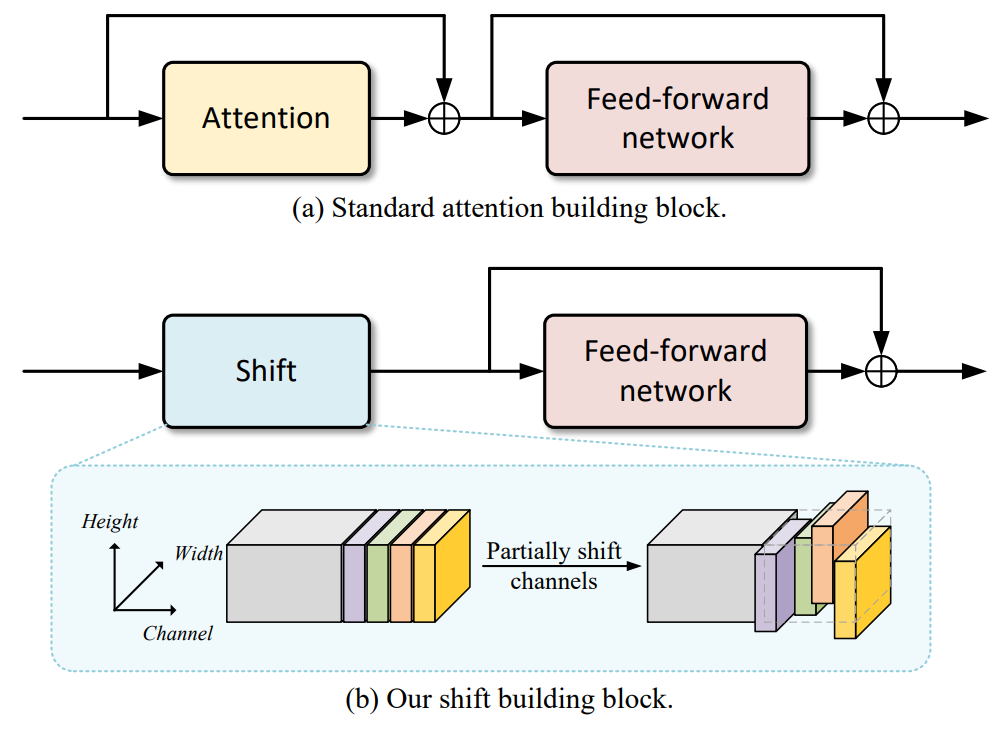
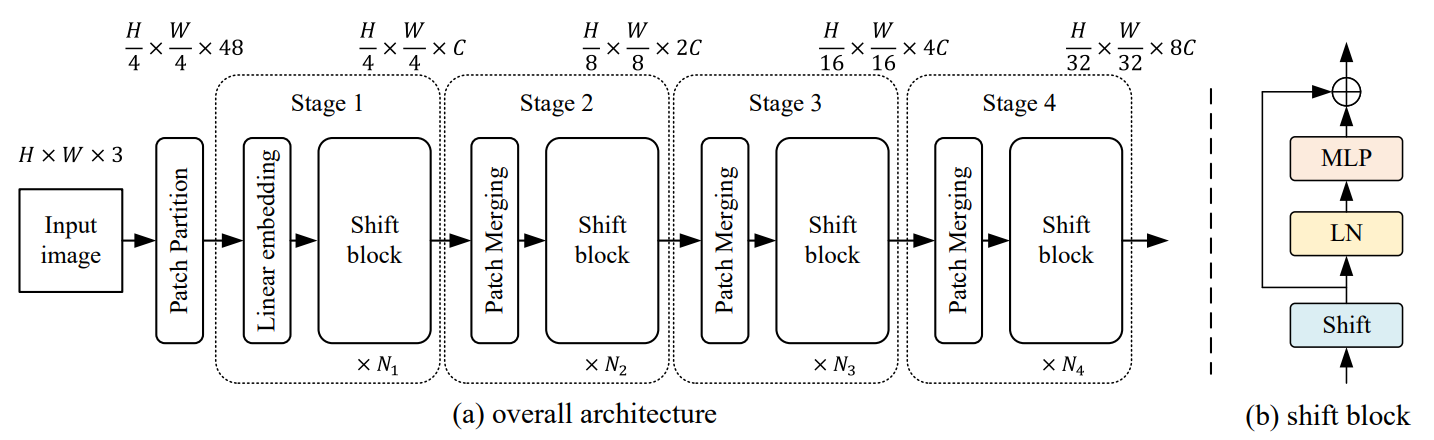

# 준비

## 라이브러리 호출

In [2]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_addons as tfa

## 데이터, 데이터셋

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
(x_train, y_train), (x_val, y_val) = (
    (x_train[:40000], y_train[:40000]),
    (x_train[40000:], y_train[40000:]),
)
print(f"Training samples: {len(x_train)}")
print(f"Validation samples: {len(x_val)}")
print(f"Testing samples: {len(x_test)}")

AUTO = tf.data.AUTOTUNE
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(config.buffer_size).batch(config.batch_size).prefetch(AUTO)

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(config.batch_size).prefetch(AUTO)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(config.batch_size).prefetch(AUTO)

Training samples: 40000
Validation samples: 10000
Testing samples: 10000


## 하이퍼파라미터 설정

In [4]:
class Config(object):
    # DATA
    batch_size = 256
    buffer_size = batch_size * 2
    input_shape = (32, 32, 3)
    num_classes = 10

    # AUGMENTATION
    image_size = 48

    # ARCHITECTURE
    patch_size = 4
    projected_dim = 96
    num_shift_blocks_per_stages = [2, 4, 8, 2]
    epsilon = 1e-5
    stochastic_depth_rate = 0.2
    mlp_dropout_rate = 0.2
    num_div = 12
    shift_pixel = 1
    mlp_expand_ratio = 2

    # OPTIMIZER
    lr_start = 1e-5
    lr_max = 1e-3
    weight_decay = 1e-4

    # TRAINING
    epochs = 100

config = Config()

## 증강

In [6]:
def get_augmentation_model():
    """Build the data augmentation model."""
    data_augmentation = keras.Sequential(
        [
            layers.Resizing(config.input_shape[0] + 20, config.input_shape[0] + 20),
            layers.RandomCrop(config.image_size, config.image_size),
            layers.RandomFlip("horizontal"),
            layers.Rescaling(1 / 255.0),
        ]
    )
    return data_augmentation

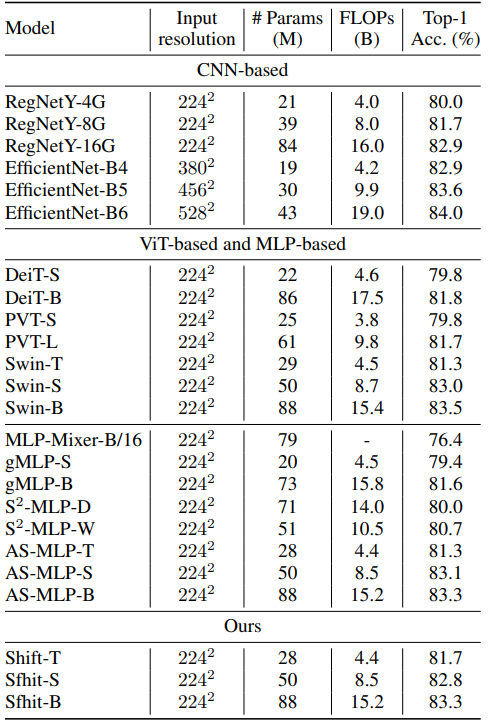